In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

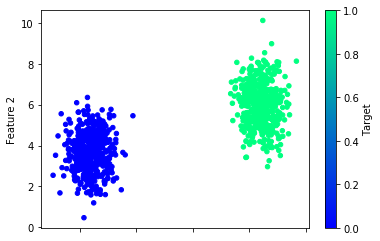

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 0s 662us/sample - loss: 0.4890 - accuracy: 0.9947
Epoch 2/100
750/750 [==============================] - 0s 50us/sample - loss: 0.4746 - accuracy: 0.9973
Epoch 3/100
750/750 [==============================] - 0s 49us/sample - loss: 0.4602 - accuracy: 0.9987
Epoch 4/100
750/750 [==============================] - 0s 59us/sample - loss: 0.4462 - accuracy: 0.9987
Epoch 5/100
750/750 [==============================] - 0s 55us/sample - loss: 0.4325 - accuracy: 1.0000
Epoch 6/100
750/750 [==============================] - 0s 59us/sample - loss: 0.4192 - accuracy: 1.0000
Epoch 7/100
750/750 [==============================] - 0s 56us/sample - loss: 0.4066 - accuracy: 1.0000
Epoch 8/100
750/750 [==============================] - ETA: 0s - loss: 0.4161 - accuracy: 1.00 - 0s 51us/sample - loss: 0.3944 - accuracy: 1.0000
Epoch 9/100
750/750 [==============================] - 0s 51us/sample - loss: 0.3826 - accuracy: 1.0000


750/750 [==============================] - 0s 41us/sample - loss: 0.0975 - accuracy: 1.0000
Epoch 79/100
750/750 [==============================] - 0s 49us/sample - loss: 0.0960 - accuracy: 1.0000
Epoch 80/100
750/750 [==============================] - 0s 44us/sample - loss: 0.0946 - accuracy: 1.0000
Epoch 81/100
750/750 [==============================] - 0s 39us/sample - loss: 0.0932 - accuracy: 1.0000
Epoch 82/100
750/750 [==============================] - 0s 40us/sample - loss: 0.0918 - accuracy: 1.0000
Epoch 83/100
750/750 [==============================] - 0s 39us/sample - loss: 0.0905 - accuracy: 1.0000
Epoch 84/100
750/750 [==============================] - 0s 41us/sample - loss: 0.0891 - accuracy: 1.0000
Epoch 85/100
750/750 [==============================] - 0s 43us/sample - loss: 0.0878 - accuracy: 1.0000
Epoch 86/100
750/750 [==============================] - 0s 37us/sample - loss: 0.0866 - accuracy: 1.0000
Epoch 87/100
750/750 [==============================] - 0s 43us/samp

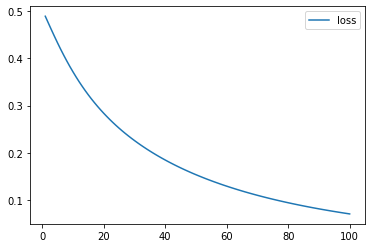

In [11]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

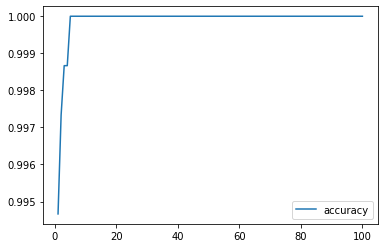

In [12]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

250/250 - 0s - loss: 0.0667 - accuracy: 1.0000
Loss: 0.06670741140842437, Accuracy: 1.0


In [14]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
nn_model.predict_classes(new_X_scaled)

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

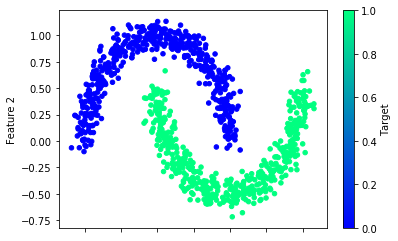

In [15]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")


In [16]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [17]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 0s 358us/sample - loss: 0.8073 - accuracy: 0.6360
Epoch 2/100
750/750 [==============================] - 0s 49us/sample - loss: 0.7103 - accuracy: 0.6600
Epoch 3/100
750/750 [==============================] - 0s 44us/sample - loss: 0.6467 - accuracy: 0.6773
Epoch 4/100
750/750 [==============================] - 0s 53us/sample - loss: 0.6061 - accuracy: 0.6933
Epoch 5/100
750/750 [==============================] - 0s 52us/sample - loss: 0.5763 - accuracy: 0.7027
Epoch 6/100
750/750 [==============================] - 0s 52us/sample - loss: 0.5532 - accuracy: 0.7120
Epoch 7/100
750/750 [==============================] - 0s 53us/sample - loss: 0.5339 - accuracy: 0.7227
Epoch 8/100
750/750 [==============================] - 0s 48us/sample - loss: 0.5182 - accuracy: 0.7333
Epoch 9/100
750/750 [==============================] - 0s 45us/sample - loss: 0.5037 - accuracy: 0.7387
Epoch 10/100
750/750 [====================

750/750 [==============================] - 0s 41us/sample - loss: 0.2673 - accuracy: 0.8920
Epoch 79/100
750/750 [==============================] - 0s 39us/sample - loss: 0.2670 - accuracy: 0.8920
Epoch 80/100
750/750 [==============================] - 0s 40us/sample - loss: 0.2668 - accuracy: 0.8920
Epoch 81/100
750/750 [==============================] - 0s 38us/sample - loss: 0.2665 - accuracy: 0.8920
Epoch 82/100
750/750 [==============================] - 0s 41us/sample - loss: 0.2663 - accuracy: 0.8920
Epoch 83/100
750/750 [==============================] - 0s 39us/sample - loss: 0.2658 - accuracy: 0.8920
Epoch 84/100
750/750 [==============================] - 0s 40us/sample - loss: 0.2656 - accuracy: 0.8920
Epoch 85/100
750/750 [==============================] - 0s 43us/sample - loss: 0.2653 - accuracy: 0.8920
Epoch 86/100
750/750 [==============================] - 0s 39us/sample - loss: 0.2650 - accuracy: 0.8920
Epoch 87/100
750/750 [==============================] - 0s 37us/samp

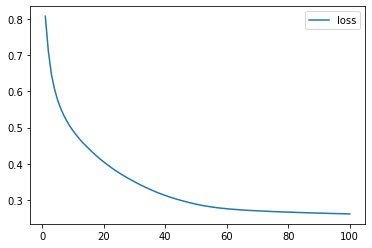

In [18]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

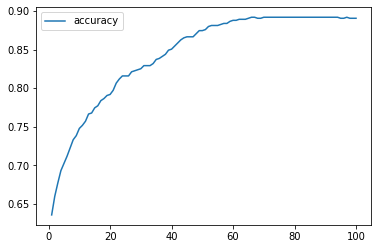

In [19]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [20]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [21]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [22]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 0s 467us/sample - loss: 0.7367 - accuracy: 0.3440
Epoch 2/100
750/750 [==============================] - 0s 46us/sample - loss: 0.6929 - accuracy: 0.3587
Epoch 3/100
750/750 [==============================] - 0s 40us/sample - loss: 0.6538 - accuracy: 0.4173
Epoch 4/100
750/750 [==============================] - 0s 46us/sample - loss: 0.6192 - accuracy: 0.5440
Epoch 5/100
750/750 [==============================] - 0s 48us/sample - loss: 0.5870 - accuracy: 0.6360
Epoch 6/100
750/750 [==============================] - 0s 43us/sample - loss: 0.5577 - accuracy: 0.7280
Epoch 7/100
750/750 [==============================] - 0s 48us/sample - loss: 0.5306 - accuracy: 0.7680
Epoch 8/100
750/750 [==============================] - 0s 44us/sample - loss: 0.5064 - accuracy: 0.7907
Epoch 9/100
750/750 [==============================] - 0s 60us/sample - loss: 0.4834 - accuracy: 0.7987
Epoch 10/100
750/750 [====================

750/750 [==============================] - 0s 37us/sample - loss: 0.1727 - accuracy: 0.9307
Epoch 79/100
750/750 [==============================] - 0s 45us/sample - loss: 0.1714 - accuracy: 0.9307
Epoch 80/100
750/750 [==============================] - 0s 41us/sample - loss: 0.1699 - accuracy: 0.9307
Epoch 81/100
750/750 [==============================] - 0s 37us/sample - loss: 0.1684 - accuracy: 0.9307
Epoch 82/100
750/750 [==============================] - 0s 40us/sample - loss: 0.1669 - accuracy: 0.9307
Epoch 83/100
750/750 [==============================] - 0s 40us/sample - loss: 0.1654 - accuracy: 0.9307
Epoch 84/100
750/750 [==============================] - 0s 39us/sample - loss: 0.1640 - accuracy: 0.9333
Epoch 85/100
750/750 [==============================] - 0s 43us/sample - loss: 0.1626 - accuracy: 0.9320
Epoch 86/100
750/750 [==============================] - 0s 41us/sample - loss: 0.1611 - accuracy: 0.9333
Epoch 87/100
750/750 [==============================] - 0s 37us/samp

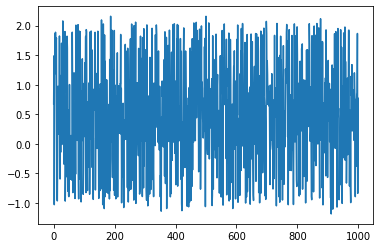

In [24]:
s = pd.Series(df_moons["Feature 1"])
s.plot.line()

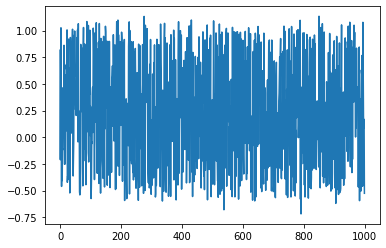

In [25]:
s = pd.Series(df_moons["Feature 2"])
s.plot.line()

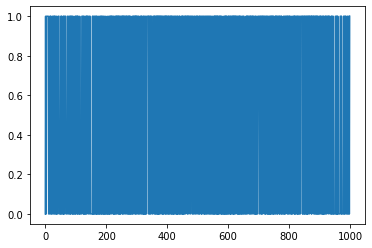

In [26]:
s = pd.Series(df_moons["Target"])
s.plot.line()

In [27]:
# Generate our new Sequential model
new_model1 = tf.keras.models.Sequential()

In [39]:

# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model1.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="tanh", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model1.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [40]:
# Compile the Sequential model together and customize metrics
new_model1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model1 = new_model1.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 0s 634us/sample - loss: 0.9102 - accuracy: 0.4067
Epoch 2/100
750/750 [==============================] - 0s 55us/sample - loss: 0.8242 - accuracy: 0.5120
Epoch 3/100
750/750 [==============================] - 0s 45us/sample - loss: 0.7470 - accuracy: 0.6120
Epoch 4/100
750/750 [==============================] - 0s 52us/sample - loss: 0.6789 - accuracy: 0.6840
Epoch 5/100
750/750 [==============================] - 0s 48us/sample - loss: 0.6199 - accuracy: 0.7253
Epoch 6/100
750/750 [==============================] - 0s 52us/sample - loss: 0.5681 - accuracy: 0.7760
Epoch 7/100
750/750 [==============================] - 0s 45us/sample - loss: 0.5246 - accuracy: 0.7920
Epoch 8/100
750/750 [==============================] - 0s 44us/sample - loss: 0.4868 - accuracy: 0.8093
Epoch 9/100
750/750 [==============================] - 0s 51us/sample - loss: 0.4543 - accuracy: 0.8267
Epoch 10/100
750/750 [====================

750/750 [==============================] - 0s 45us/sample - loss: 0.2467 - accuracy: 0.8973
Epoch 79/100
750/750 [==============================] - 0s 41us/sample - loss: 0.2465 - accuracy: 0.8973
Epoch 80/100
750/750 [==============================] - 0s 43us/sample - loss: 0.2463 - accuracy: 0.8973
Epoch 81/100
750/750 [==============================] - 0s 41us/sample - loss: 0.2459 - accuracy: 0.8973
Epoch 82/100
750/750 [==============================] - 0s 45us/sample - loss: 0.2456 - accuracy: 0.8973
Epoch 83/100
750/750 [==============================] - 0s 37us/sample - loss: 0.2453 - accuracy: 0.8973
Epoch 84/100
750/750 [==============================] - 0s 43us/sample - loss: 0.2451 - accuracy: 0.8973
Epoch 85/100
750/750 [==============================] - 0s 40us/sample - loss: 0.2447 - accuracy: 0.8973
Epoch 86/100
750/750 [==============================] - 0s 45us/sample - loss: 0.2445 - accuracy: 0.8973
Epoch 87/100
750/750 [==============================] - 0s 42us/samp